C:\nucar\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\nucar\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\nucar\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Evaluation Results:
               Model  R2 Score       MAE       RMSE
0  Linear Regression  0.202744  7.387402   9.624828
1      Random Forest  0.098123  7.841486  10.236886
2    k-NN Regression -0.140760  9.218919  11.513071


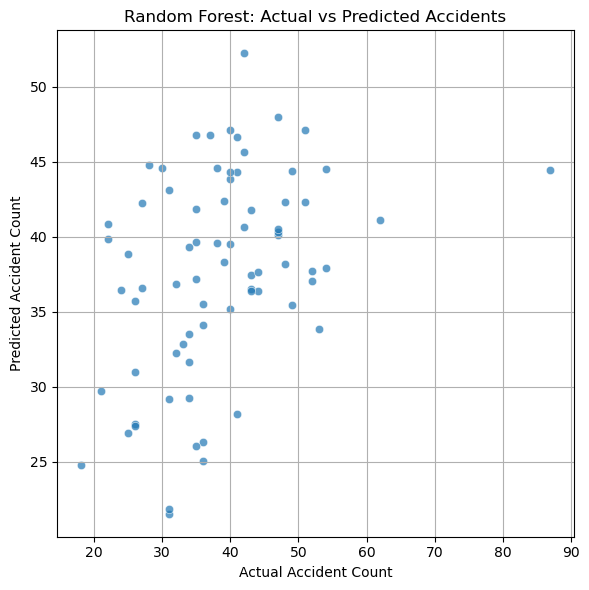

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("final_numeric_weather_accidents.xlsx")

# Feature engineering: add 'IsWeekend'
df['Date'] = pd.to_datetime(df['Date'])
df['IsWeekend'] = df['Date'].dt.dayofweek >= 5
df['IsWeekend'] = df['IsWeekend'].astype(int)

# Define features and target
X = df[['Temperature', 'Windgust', 'Humidity', 'IsWeekend']]
y = df['Accident Count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'k-NN Regression': KNeighborsRegressor(n_neighbors=5)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False)
    })

# Show evaluation results
results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
print(results_df)

# Plot actual vs predicted for best model (Random Forest)
best_model = models['Random Forest']
y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_best_pred, alpha=0.7)
plt.xlabel("Actual Accident Count")
plt.ylabel("Predicted Accident Count")
plt.title("Random Forest: Actual vs Predicted Accidents")
plt.grid(True)
plt.tight_layout()
plt.savefig("random_forest_actual_vs_predicted.png")
plt.show()
